In [2]:
import networkx as nx
G = nx.Graph()
G.add_edge('A', 'B', weight=4)
G.add_edge('B', 'D', weight=2)
G.add_edge('A', 'C', weight=3)
G.add_edge('C', 'D', weight=4)
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

In [3]:
import matplotlib.pyplot as plt


NetworkXError: Node 'A' has no position.

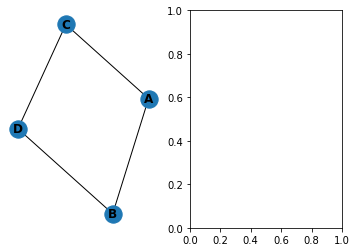

In [6]:
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

# Simulation of social networks

In [7]:
import numpy as np
import pandas as ps
import networkx as nx

from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

### Getnerating a graph object and edgelist

In [13]:
DG = nx.gn_graph(7, seed=25)
for line in nx.generate_edgelist(DG, data=False):
    print(line)

1 0
2 0
3 2
4 3
5 0
6 4


In [14]:
DG.nodes

NodeView((0, 1, 2, 3, 4, 5, 6))

In [15]:
DG.node[0]

{}

### Assigning attributes to nodes

In [16]:
DG.node[0]['name'] = 'Alice'

In [17]:
DG.node[0]

{'name': 'Alice'}

In [18]:
DG.node[0]['name'] = 'Alice'
DG.node[1]['name'] = 'Bod'
DG.node[2]['name'] = 'Claire'
DG.node[3]['name'] = 'Denis'
DG.node[4]['name'] = 'Eather'
DG.node[5]['name'] = 'Frank'
DG.node[6]['name'] = 'George'

Karate dataset

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


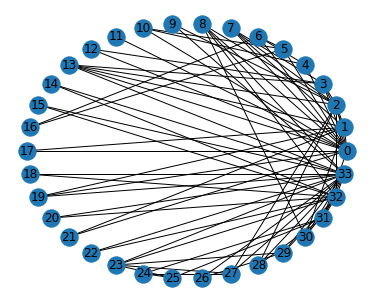

In [22]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))

nx.draw_circular(G, with_labels=True)
plt.show()

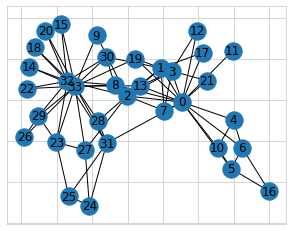

In [29]:
nx.draw_networkx(G, with_labels=True)
plt.show()

## Football dataset

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung 12
FloridaState 12
Iowa 12
KansasState 12
NewMexico 11
TexasTech 12
PennState 12
SouthernCalifornia 12
ArizonaState 11
SanDiegoState 11
Baylor 10
NorthTexas 10
NorthernIllinois 10
Northwestern 11
WesternMichig

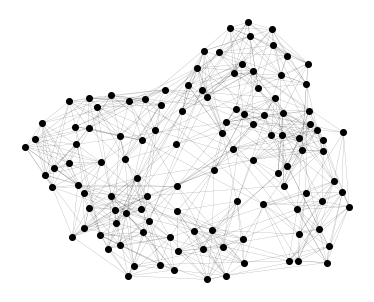

In [30]:
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2007-2019 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

try:  # Python 3.x
    import urllib.request as urllib
except ImportError:  # Python 2.x
    import urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read('football.txt').decode()  # read info file
gml = zf.read('football.gml').decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print('%s %d' % (n, d))

options = {
    'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.1,
}
nx.draw(G, **options)
plt.show()